# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy




### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 569


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url =  f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tolanaro
Processing Record 2 of Set 1 | udachny
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | lebu
Processing Record 5 of Set 1 | blackmans bay
Processing Record 6 of Set 1 | ribeira grande
Processing Record 7 of Set 1 | raduzhny
Processing Record 8 of Set 1 | howard springs
Processing Record 9 of Set 1 | yellowknife
Processing Record 10 of Set 1 | port mathurin
Processing Record 11 of Set 1 | waitangi
Processing Record 12 of Set 1 | inekar
City not found. Skipping...
Processing Record 13 of Set 1 | mahina
Processing Record 14 of Set 1 | invercargill
Processing Record 15 of Set 1 | grytviken
Processing Record 16 of Set 1 | alofi
Processing Record 17 of Set 1 | flying fish cove
Processing Record 18 of Set 1 | campo grande
Processing Record 19 of Set 1 | al manshah
Processing Record 20 of Set 1 | dudinka
Processing Record 21 of Set 1 | ponta delgada
Processing Record 22 of S

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          543
Lat           543
Lng           543
Max Temp      543
Humidity      543
Cloudiness    543
Wind Speed    543
Country       543
Date          543
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tolanaro,-25.0319,46.9987,299.19,73,20,7.20,MG,1708451850
1,udachny,66.4167,112.4000,247.93,99,96,2.07,RU,1708451850
2,ushuaia,-54.8000,-68.3000,284.96,58,40,9.26,AR,1708451828
3,lebu,-37.6167,-73.6500,289.83,84,97,3.38,CL,1708451850
4,blackmans bay,-43.0167,147.3167,287.89,87,3,3.11,AU,1708451851


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")


In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tolanaro,-25.0319,46.9987,299.19,73,20,7.20,MG,1708451850
1,udachny,66.4167,112.4000,247.93,99,96,2.07,RU,1708451850
2,ushuaia,-54.8000,-68.3000,284.96,58,40,9.26,AR,1708451828
3,lebu,-37.6167,-73.6500,289.83,84,97,3.38,CL,1708451850
4,blackmans bay,-43.0167,147.3167,287.89,87,3,3.11,AU,1708451851


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

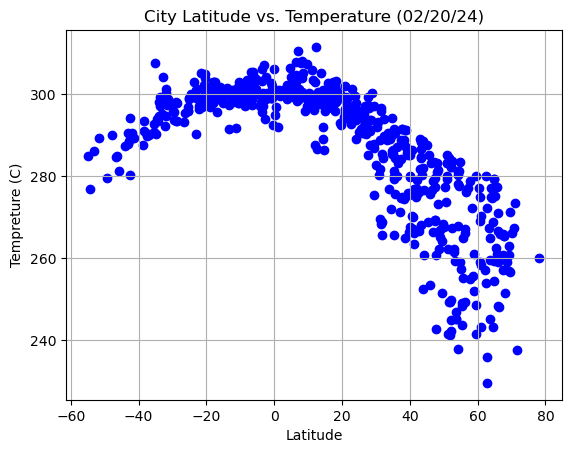

In [8]:
# Build scatter plot for latitude vs. temperature
latitude = city_data_df["Lat"]
temp = city_data_df["Max Temp"]
plt.scatter(latitude, temp, color="b", marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Temperature ({time.strftime('%x')})")
plt.xlabel("Latitude")
plt.ylabel("Tempreture (C)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

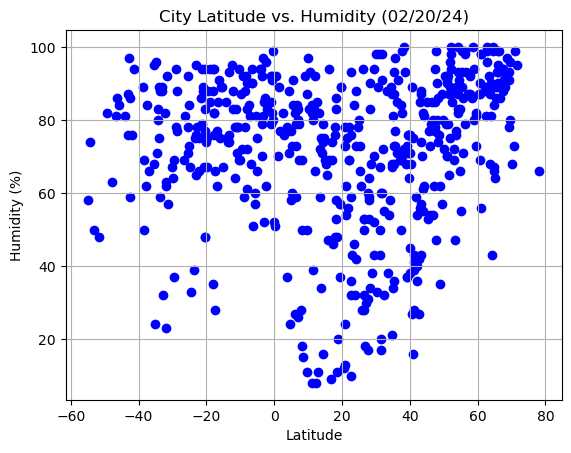

In [9]:
# Build the scatter plots for latitude vs. humidity
lat = city_data_df["Lat"]
humidity = city_data_df["Humidity"]
plt.scatter(lat, humidity, color="b", marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({time.strftime('%x')})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

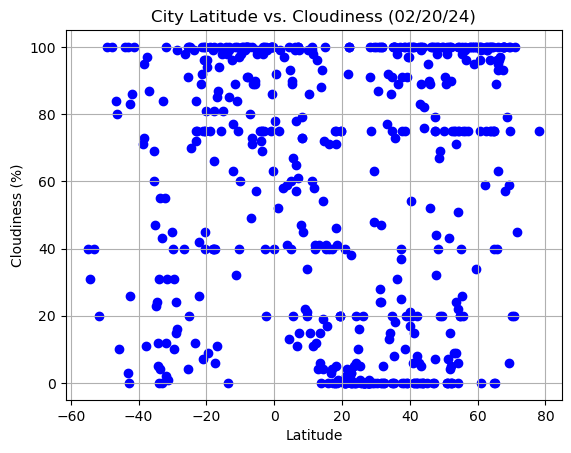

In [10]:
# Build the scatter plots for latitude vs. cloudiness
lat = city_data_df["Lat"]
cloudiness = city_data_df["Cloudiness"]
plt.scatter(lat, cloudiness, color="b", marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({time.strftime('%x')})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

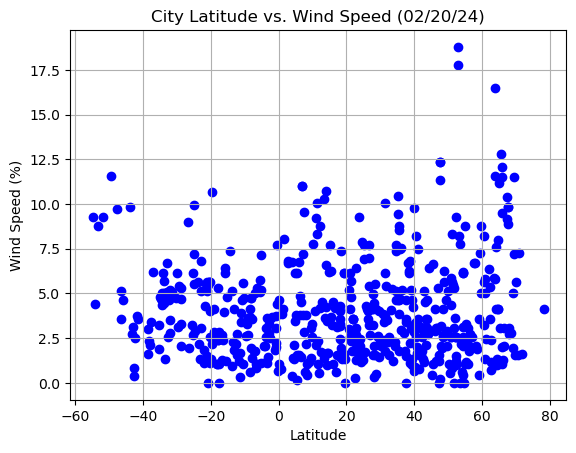

In [11]:
# Build the scatter plots for latitude vs. wind speed
lat = city_data_df["Lat"]
wind_speed = city_data_df["Wind Speed"]
plt.scatter(lat, wind_speed, color="b", marker="o")
# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({time.strftime('%x')})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_val, y_val, text_coord):
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_val, y_val)

    regression_val = x_val * slope + intercept
    line = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

    plt.scatter(x_val, y_val)
    plt.plot(x_val, regression_val, "r-")
    plt.annotate(line, text_coord)
    plt.xlabel("Latitude")
    plt.ylabel("Max Temp")
    plt.show()


In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[(city_data_df["Lat"]>= 0)]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,udachny,66.4167,112.4000,247.93,99,96,2.07,RU,1708451850
5,ribeira grande,38.5167,-28.7000,291.37,72,75,6.26,PT,1708451851
6,raduzhny,62.0961,77.4750,257.05,89,59,6.34,RU,1708451851
8,yellowknife,62.4560,-114.3525,253.94,81,75,3.60,CA,1708451851
17,al manshah,26.4769,31.8035,292.29,32,0,3.60,EG,1708451853


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[(city_data_df["Lat"]< 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tolanaro,-25.0319,46.9987,299.19,73,20,7.20,MG,1708451850
2,ushuaia,-54.8000,-68.3000,284.96,58,40,9.26,AR,1708451828
3,lebu,-37.6167,-73.6500,289.83,84,97,3.38,CL,1708451850
4,blackmans bay,-43.0167,147.3167,287.89,87,3,3.11,AU,1708451851
7,howard springs,-12.4970,131.0470,301.10,95,96,2.18,AU,1708451851


###  Temperature vs. Latitude Linear Regression Plot

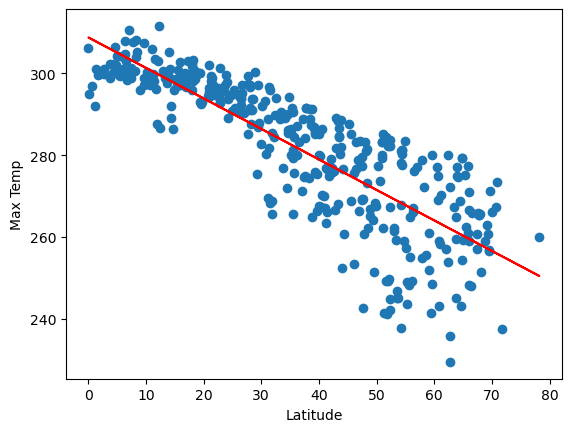

In [15]:
# Linear regression on Northern Hemisphere
x_val = northern_hemi_df ["Lat"]
y_val = northern_hemi_df ["Max Temp"]
plot_linear_regression(x_val, y_val,(50, 30))

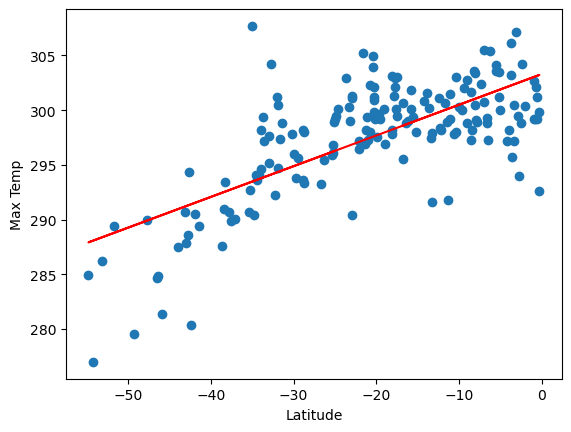

In [16]:
# Linear regression on Southern Hemisphere
x_val = southern_hemi_df ["Lat"]
y_val = southern_hemi_df ["Max Temp"]
plot_linear_regression(x_val, y_val,(-20, 35))

**Discussion about the linear relationship:**  in the Northern Hemisphere temperature decrease with higher latitudes and South H temperature increased as it gets closer to the equator 

### Humidity vs. Latitude Linear Regression Plot

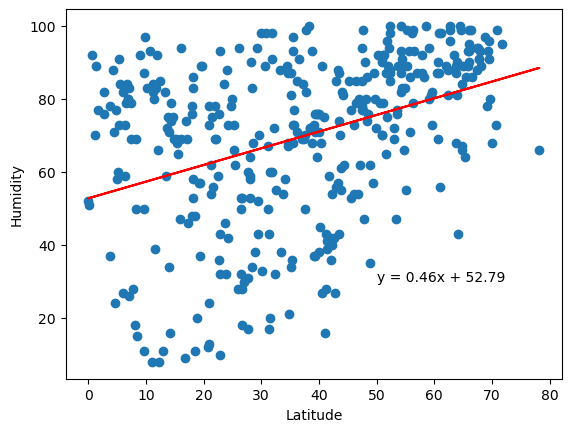

In [21]:
# Northern Hemisphere
def plot_linear_regression(x_val, y_val, text_coord):

    #linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_val, y_val)
    
    #regression values
    reg_val = x_val * slope + intercept
    line = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

    #plot
    plt.scatter(x_val, y_val)
    plt.plot(x_val, reg_val, "r-")
    plt.annotate(line, text_coord)
    plt.xlabel("Latitude")
    plt.ylabel("Humidity")
    plt.show()

# Northern Hemisphere
x_val = northern_hemi_df ["Lat"]
y_val = northern_hemi_df ["Humidity"]
plot_linear_regression(x_val, y_val,(50, 30))


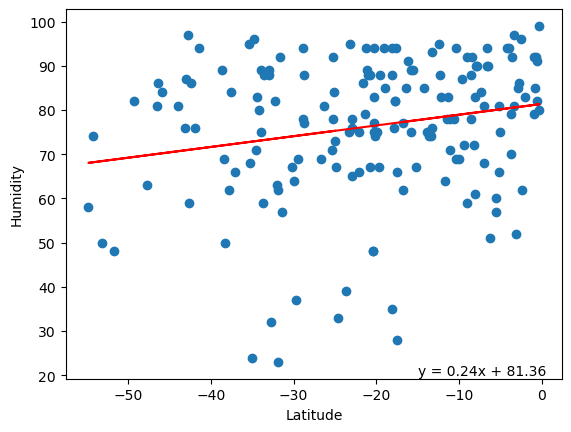

In [22]:
# Southern Hemisphere
x_val = southern_hemi_df ["Lat"]
y_val = southern_hemi_df ["Humidity"]
plot_linear_regression(x_val, y_val,(-15, 20))

**Discussion about the linear relationship:** Relationship between lat and  Hum. is apparently istronget in the Northern Hemisphere than South.

### Cloudiness vs. Latitude Linear Regression Plot

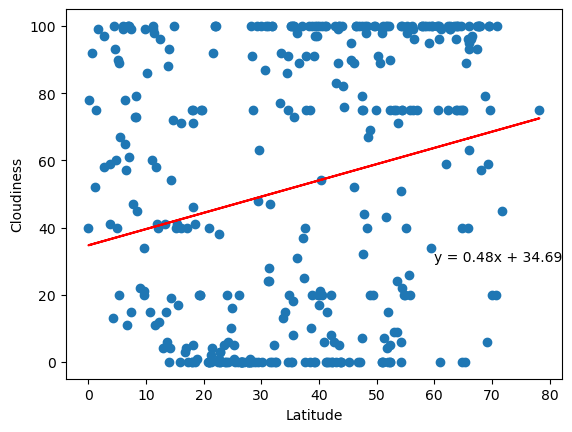

In [24]:
# Northern Hemisphere

def plot_linear_regression(x_val, y_val, text_coord):

    
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_val, y_val)
    
    
    reg_val = x_val * slope + intercept
    line = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

    
    plt.scatter(x_val, y_val)
    plt.plot(x_val, reg_val, "r-")
    plt.annotate(line, text_coord)
    plt.xlabel("Latitude")
    plt.ylabel("Cloudiness")
    plt.show()


x_val = northern_hemi_df ["Lat"]
y_val = northern_hemi_df ["Cloudiness"]
plot_linear_regression(x_val, y_val,(60, 30))

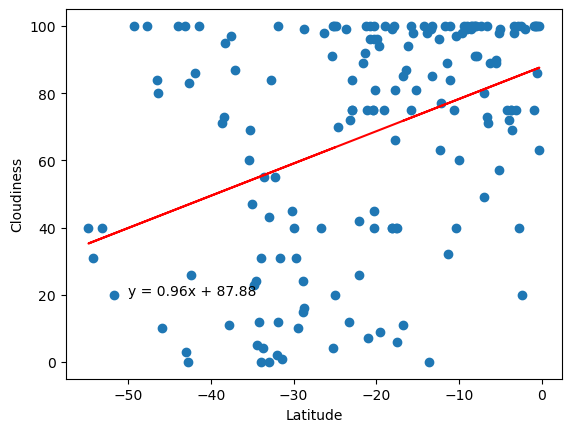

In [25]:
# Southern Hemisphere
x_val = southern_hemi_df ["Lat"]
y_val = southern_hemi_df ["Cloudiness"]
plot_linear_regression(x_val, y_val,(-50, 20))

**Discussion about the linear relationship:**  Clouds are sporadic spread across latitutes in both hemispheres. Meaning that is pretty similar on both hemispheres

### Wind Speed vs. Latitude Linear Regression Plot

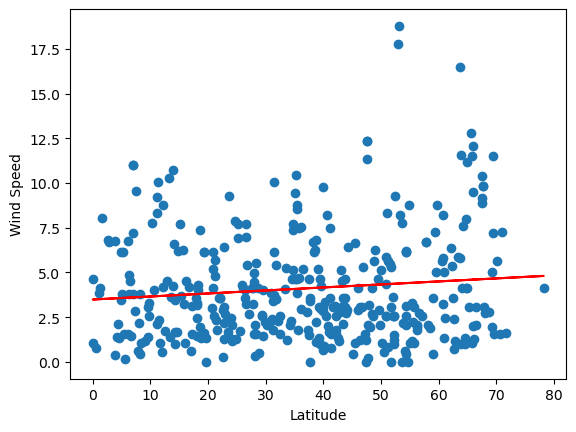

In [26]:
# Northern Hemisphere
# new function definition
def plot_linear_regression(x_val, y_val, text_coord):

    #linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_val, y_val)
    
    #regression values
    reg_val = x_val * slope + intercept
    line = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

    #plot
    plt.scatter(x_val, y_val)
    plt.plot(x_val, reg_val, "r-")
    plt.annotate(line, text_coord)
    plt.xlabel("Latitude")
    plt.ylabel("Wind Speed")
    plt.show()

# Northern Hemisphere
x_val = northern_hemi_df ["Lat"]
y_val = northern_hemi_df ["Wind Speed"]
plot_linear_regression(x_val, y_val,(60, 30))

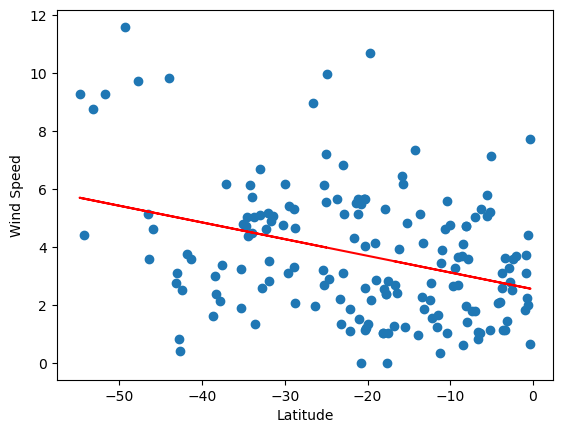

In [27]:
# Southern Hemisphere
x_val = southern_hemi_df ["Lat"]
y_val = southern_hemi_df ["Wind Speed"]
plot_linear_regression(x_val, y_val,(-50, 20))

**Discussion about the linear relationship:**  between Northern H and South. H no linear relationship observed.